In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Exploratory Data Analysis

In [2]:
df=pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.shape

(1338, 7)

In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## visualising the features 

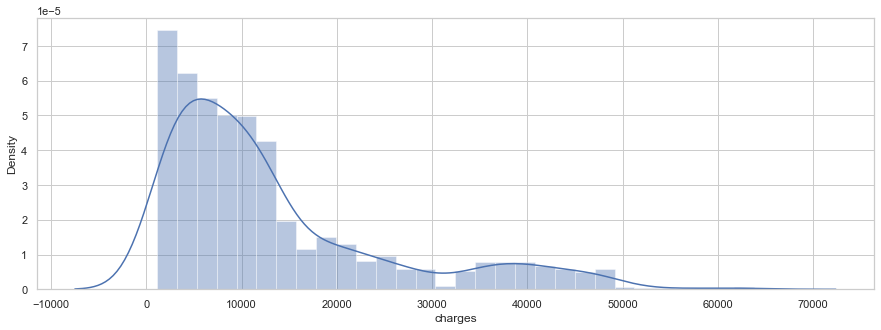

In [8]:
sns.set(style='whitegrid')
plt.figure(figsize=(15,5))
sns.distplot(df['charges'], kde = True)
plt.show()

This distribution is right-skewed. To make it closer to normal we can apply natural log

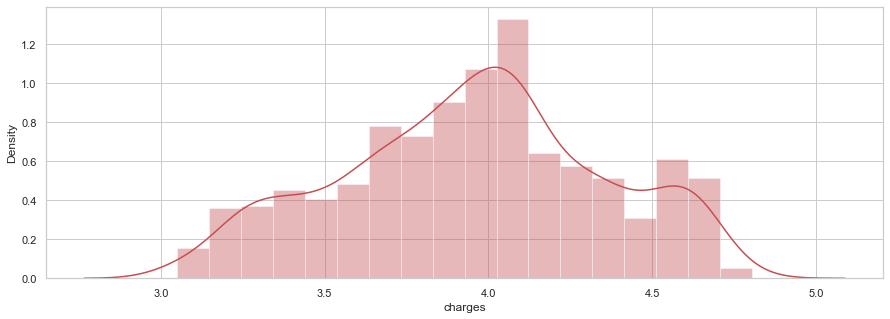

In [9]:
sns.set(style='whitegrid')
plt.figure(figsize=(15,5))
sns.distplot(np.log10(df['charges']), kde = True, color = 'r' )
plt.show()

**Taking into account certain factors (sex, smoking, having children) let's see how it changes by region**

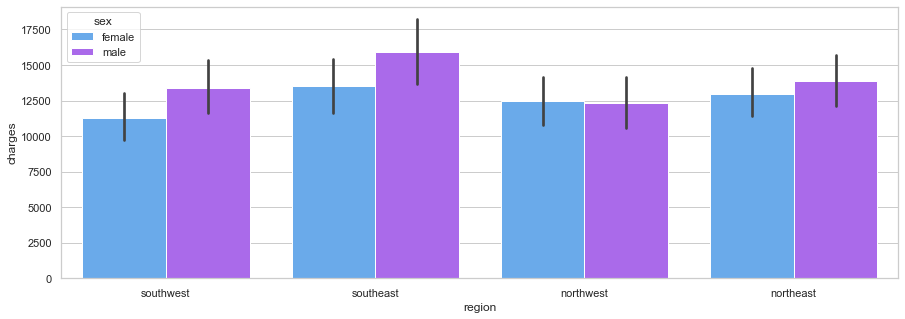

In [10]:
plt.figure(figsize=(15,5))
sns.barplot(x='region', y='charges', hue='sex', data=df, palette='cool')
plt.show()

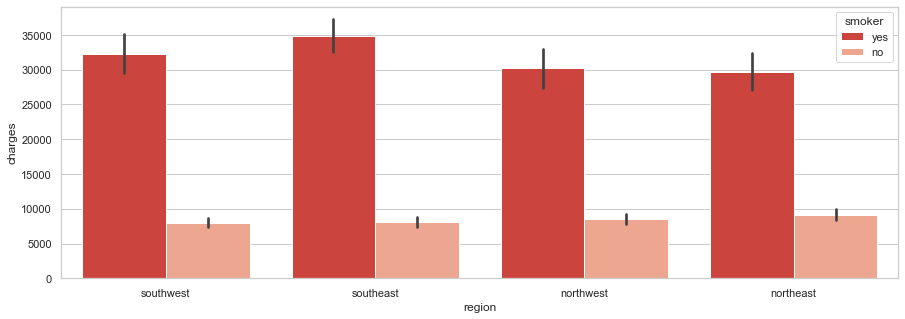

In [11]:
plt.figure(figsize=(15,5))
sns.barplot(x = 'region', y = 'charges',hue='smoker', data=df, palette='Reds_r')
plt.show()

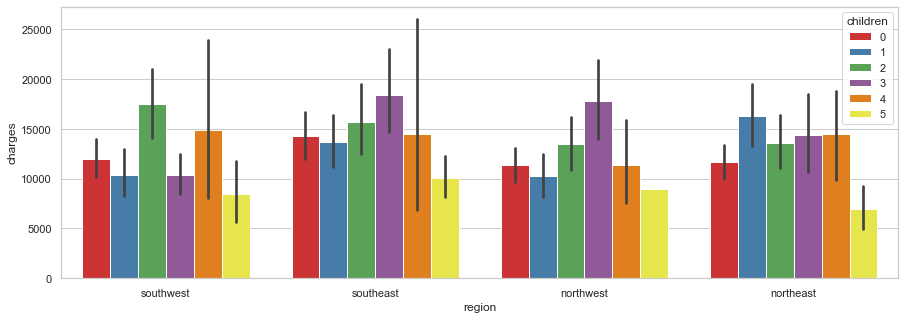

In [12]:
plt.figure(figsize=(15,5))
sns.barplot(x='region', y='charges', hue='children', data=df, palette='Set1')
plt.show()

**Converting category labels into numerical using LabelEncoder**

In [13]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

df.sex = label.fit_transform(df.sex)
df.smoker = label.fit_transform(df.smoker)
df.region = label.fit_transform(df.region)


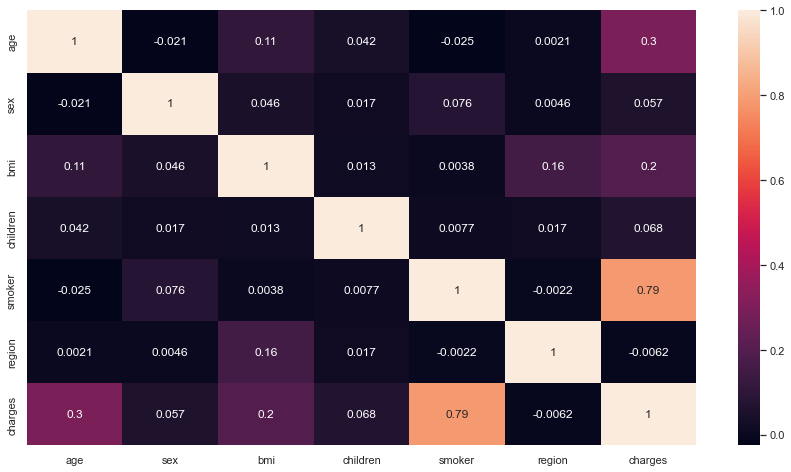

In [16]:
# finding correaltion between the dependent and independent variables
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

**smoking has the highest correlation with charges**

# Building different regression models

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

## splitting the dataset into Train and Test

In [59]:
x = df.drop(['charges'], axis = 1)
y = df['charges']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

## linear regression model

In [85]:
lr = LinearRegression()
model1=lr.fit(x_train, y_train)
y_pred1=model1.predict(x_test)

## Ridge regression model

In [86]:
r=Ridge(alpha=0.5)
model2=r.fit(x_train, y_train)
y_pred2=model2.predict(x_test)

## Lasso regression Model

In [87]:
la=Lasso(alpha=0.5)
model3=la.fit(x_train, y_train)
y_pred3=model3.predict(x_test)

## Random Forest Regressor

In [102]:
regressor = RandomForestRegressor(n_estimators=100,
                                  random_state=0)
model4=regressor.fit(x_train, y_train)
y_pred4=model4.predict(x_test)

# Evaluating the models using various evaluation metrics

In [64]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

## Model 1

In [65]:
y_pred=model1.predict(x_test)
print('Mean Squared Error: ',mean_squared_error(y_test,y_pred))
print('Mean Absolute Error: ',mean_absolute_error(y_test,y_pred))
print('R square Score: ',r2_score(y_test,y_pred))

Mean Squared Error:  32073628.560109206
Mean Absolute Error:  3998.271540886974
R square Score:  0.7962732059725786


## Model 2

In [66]:
y_pred=model2.predict(x_test)
print('Mean Squared Error: ',mean_squared_error(y_test,y_pred))
print('Mean Absolute Error: ',mean_absolute_error(y_test,y_pred))
print('R square Score: ',r2_score(y_test,y_pred))

Mean Squared Error:  32095866.22159157
Mean Absolute Error:  4005.1280003733614
R square Score:  0.7961319557404142


## Model 3

In [67]:
y_pred=model3.predict(x_test)
print('Mean Squared Error: ',mean_squared_error(y_test,y_pred))
print('Mean Absolute Error: ',mean_absolute_error(y_test,y_pred))
print('R square Score: ',r2_score(y_test,y_pred))

Mean Squared Error:  32074198.71070393
Mean Absolute Error:  3998.3743556787426
R square Score:  0.7962695844630086


## Model 4

In [68]:
y_pred=model4.predict(x_test)
print('Mean Squared Error: ',mean_squared_error(y_test,y_pred))
print('Mean Absolute Error: ',mean_absolute_error(y_test,y_pred))
print('R square Score: ',r2_score(y_test,y_pred))

Mean Squared Error:  20337176.372232523
Mean Absolute Error:  2718.622572694204
R square Score:  0.8708213592322325


1.smoker(0.606547)
2.bmi(0.212654)
3.age(0.137638)
4.children(0.021444)
5.region(0.015582)
6.sex(0.006134)


<BarContainer object of 6 artists>

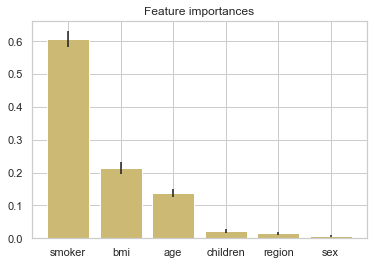

In [108]:
importances = model4.feature_importances_
std = np.std([tree.feature_importances_ for tree in model4.estimators_],axis=0)
indices = np.argsort(importances)[::-1]
variables = ['age', 'sex', 'bmi', 'children','smoker', 'region']
importance_list = []
for f in range(x.shape[1]):
    variable = variables[indices[f]]
    importance_list.append(variable)
    print("%d.%s(%f)" % (f + 1, variable, importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(importance_list, importances[indices],
       color="y", yerr=std[indices], align="center")

## Conclusion: <br>
like we previously noticed smoking is the greatest factor that affects medical cost charges, then it's bmi and age.<br>
Random Forest Regression turned out to be the best model